In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path ='/content/drive/MyDrive/archive (4)/data_file.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
X = df.drop('Benign', axis=1)
y = df['Benign']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (49988, 17)
Testing Data Shape: (12497, 17)


In [ ]:
scaler = StandardScaler()

# Identify numerical columns in X_train and X_test
numeric_cols_train = X_train.select_dtypes(include=np.number).columns
numeric_cols_test = X_test.select_dtypes(include=np.number).columns

# Ensure 'FileName' is not in the numerical columns if it was somehow included by mistake
# (though select_dtypes(include=np.number) should exclude it automatically)
if 'FileName' in numeric_cols_train:
    numeric_cols_train = numeric_cols_train.drop('FileName')
if 'FileName' in numeric_cols_test:
    numeric_cols_test = numeric_cols_test.drop('FileName')

# Scale only the numerical features
X_train_scaled = scaler.fit_transform(X_train[numeric_cols_train])
X_test_scaled = scaler.transform(X_test[numeric_cols_test])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols_train)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols_test)
print("\n✅ Data Preprocessing Done Successfully!")
print("Scaled Feature Example:")
print(X_train_scaled.head())


✅ Data Preprocessing Done Successfully!
Scaled Feature Example:
    Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
0 -0.483074  -0.670820 -0.077098          -0.052014       -0.536803   
1 -0.483074  -0.670820 -0.077098          -0.052892       -0.536803   
2 -0.483074  -0.670820 -0.077098          -0.047623       -0.536803   
3 -0.483074   1.050712 -0.075089          -0.044111        1.731474   
4 -0.483074  -0.670820 -0.077098          -0.044111        1.731474   

   ExportRVA  ExportSize    IatVRA  MajorLinkerVersion  MinorLinkerVersion  \
0  -0.024516   -0.015403 -0.124358           -0.415044           -0.391568   
1  -0.024516   -0.015403 -0.127882           -0.524800            0.320611   
2  -0.024516   -0.015403 -0.103214           -0.415044           -0.391568   
3  -0.024406   -0.015358 -0.127882            0.243493            0.201914   
4  -0.016312   -0.015400 -0.127882           -0.524800           -0.391568   

   NumberOfSections  SizeOfStackReserve

In [ ]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
log_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:32:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return [model_name, acc, prec, rec, f1]

In [ ]:
results = []
results.append(evaluate_model(y_test, y_pred_log, "Logistic Regression"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))


📊 Logistic Regression Performance:
Accuracy: 0.8709
Precision: 0.9219
Recall: 0.7677
F1-Score: 0.8377

📊 Random Forest Performance:
Accuracy: 0.9965
Precision: 0.9967
Recall: 0.9952
F1-Score: 0.9959

📊 XGBoost Performance:
Accuracy: 0.9961
Precision: 0.9961
Recall: 0.9948
F1-Score: 0.9955


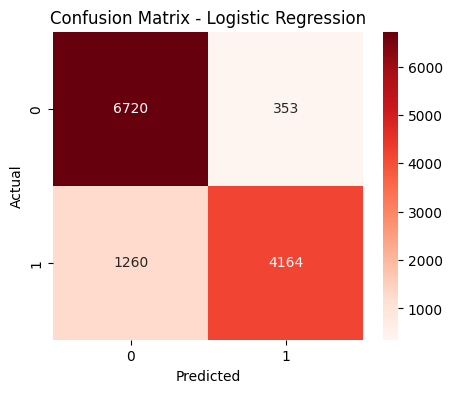

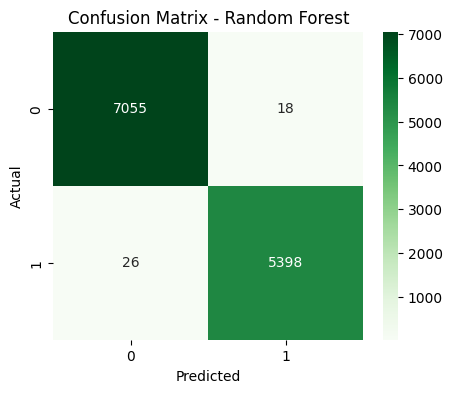

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print("\n✅ Model Comparison:")
print(results_df)


✅ Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.870929   0.921851  0.767699  0.837743
1        Random Forest  0.996479   0.996677  0.995206  0.995941
2              XGBoost  0.996079   0.996123  0.994838  0.995480


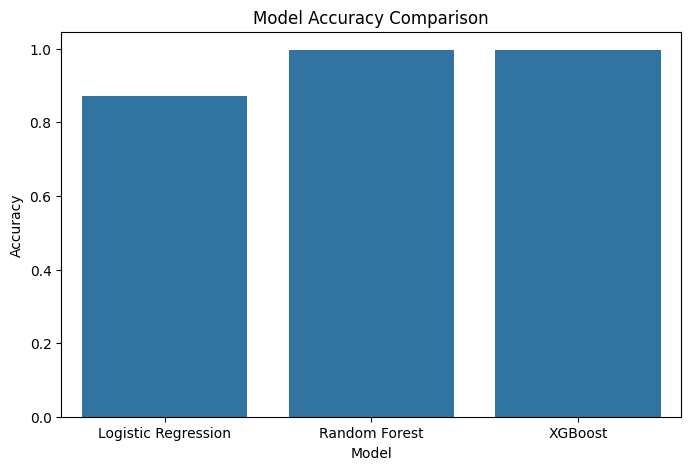

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

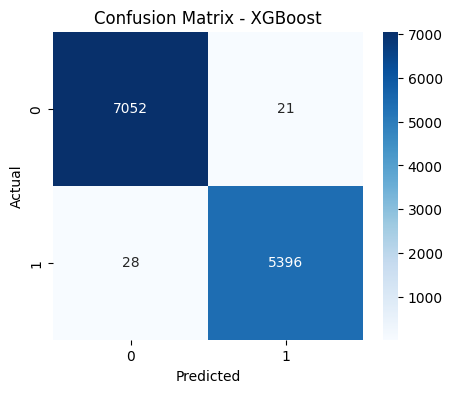

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:36:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [ ]:
print("\n🏆 Best Parameters Found:")
print(grid_search.best_params_)

best_xgb = grid_search.best_estimator_


🏆 Best Parameters Found:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_best = best_xgb.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("\n📊 Tuned XGBoost Model Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")


📊 Tuned XGBoost Model Performance:
Accuracy:  0.9959
Precision: 0.9959
Recall:    0.9947
F1-Score:  0.9953


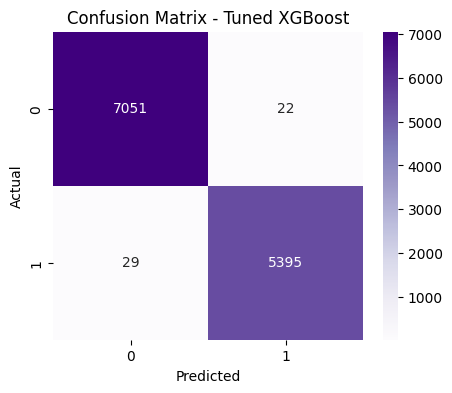

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# ====== Step 1: Import Libraries ======
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ====== Step 2: Prepare Data for CNN ======
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)
print("CNN Input Shape:", X_train_cnn.shape)

CNN Input Shape: (49988, 15, 1)


In [ ]:
# ====== Step 3: Build CNN Model ======
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ====== Step 4: Compile Model ======
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,945 (261.50 KB)

 Trainable params: 66,561 (260.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# ====== Step 5: Train the Model ======
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_cnn, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9564 - loss: 0.1366 - val_accuracy: 0.9773 - val_loss: 0.0865
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9781 - loss: 0.0746 - val_accuracy: 0.9817 - val_loss: 0.0589
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9807 - loss: 0.0680 - val_accuracy: 0.9828 - val_loss: 0.0557
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9829 - loss: 0.0610 - val_accuracy: 0.9829 - val_loss: 0.0582
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9820 - loss: 0.0604 - val_accuracy: 0.9882 - val_loss: 0.0521


In [ ]:
# ====== Step 6: Evaluate Model ======
y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 CNN Model Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📊 CNN Model Performance:
Accuracy:  0.9858
Precision: 0.9802
Recall:    0.9873
F1-Score:  0.9837


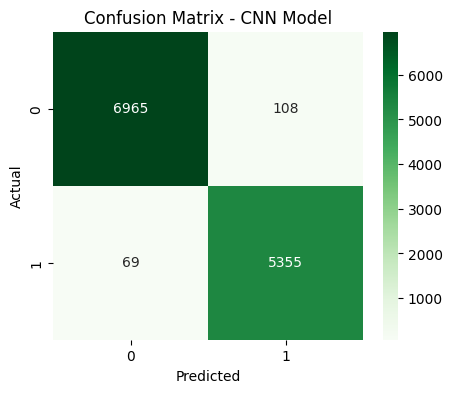

In [ ]:
# ====== Step 7: Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - CNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

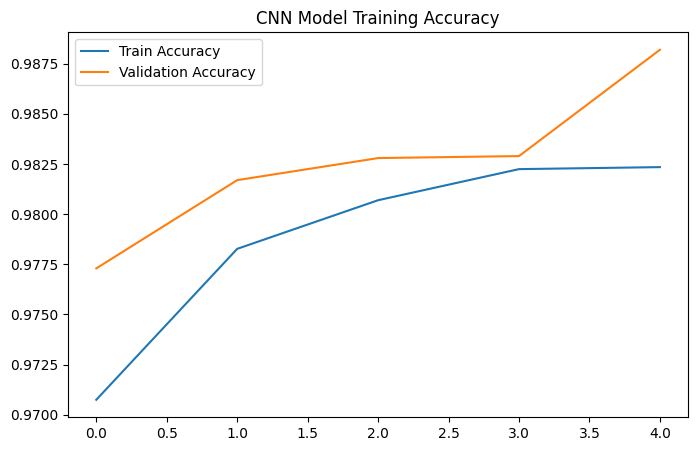

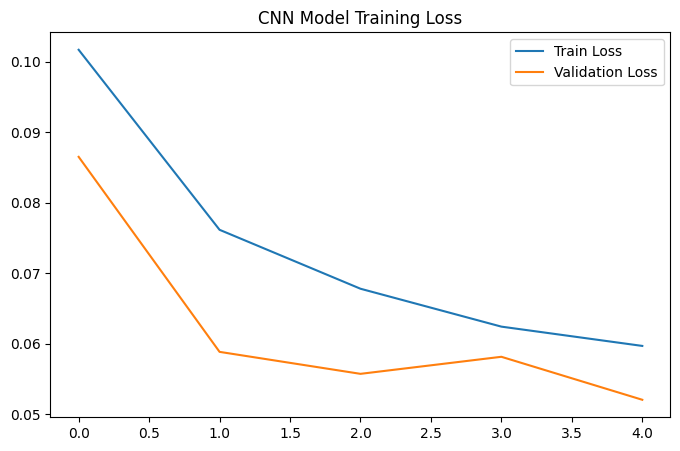

In [ ]:
# ====== Step 8: Training Curves ======
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Model Training Accuracy")
plt.show()
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("CNN Model Training Loss")
plt.show()

In [ ]:
# ====== Step 1: Import Libraries ======
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train_lstm = np.expand_dims(X_train_scaled, axis=2)
X_test_lstm = np.expand_dims(X_test_scaled, axis=2)
print("LSTM Input Shape:", X_train_lstm.shape)

LSTM Input Shape: (49988, 15, 1)


In [ ]:
# ====== Step 3: Build LSTM Model ======
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# ====== Step 4: Compile Model ======
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,657 (213.50 KB)

 Trainable params: 54,401 (212.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# ====== Step 5: Train Model ======
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_lstm, y_train,
    epochs=5,
    batch_size=8,
    validation_split=0.5,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.8486 - loss: 0.3538 - val_accuracy: 0.9529 - val_loss: 0.1311
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9427 - loss: 0.1643 - val_accuracy: 0.9589 - val_loss: 0.1443
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9605 - loss: 0.1298 - val_accuracy: 0.9720 - val_loss: 0.0999
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9674 - loss: 0.1133 - val_accuracy: 0.9740 - val_loss: 0.0957
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9673 - loss: 0.1081 - val_accuracy: 0.9746 - val_loss: 0.0989


In [ ]:
# ====== Step 6: Evaluate Model ======
y_pred_prob = model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("\n📊 LSTM Model Performance:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

📊 LSTM Model Performance:
Accuracy:  0.9727
Precision: 0.9647
Recall:    0.9727
F1-Score:  0.9687


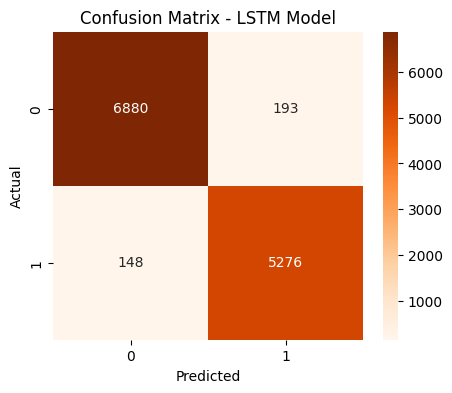

In [ ]:
# ====== Step 7: Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - LSTM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

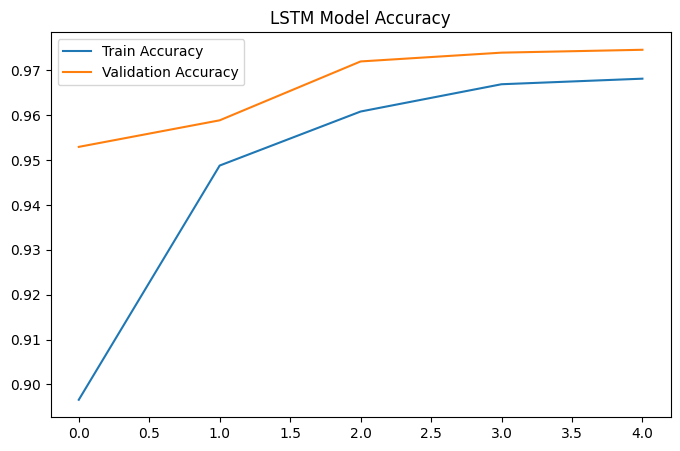

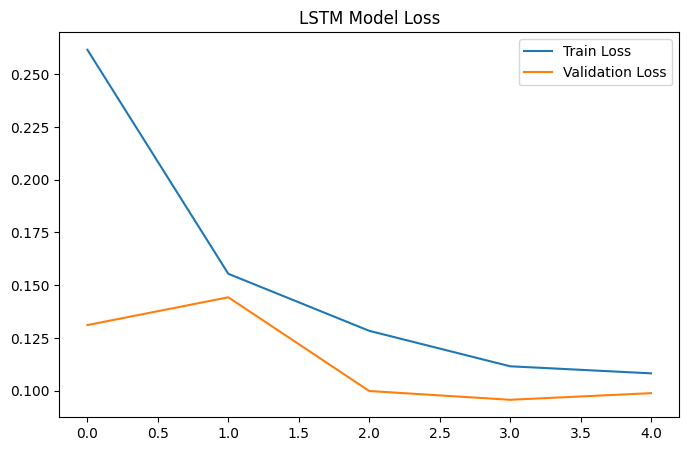

In [ ]:
# ====== Step 8: Training Curves ======
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("LSTM Model Accuracy")
plt.show()
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("LSTM Model Loss")
plt.show()


Overall Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8709     0.9219  0.7677    0.8377
1        Random Forest    0.9965     0.9967  0.9952    0.9959
2              XGBoost    0.9959     0.9959  0.9947    0.9953
3                  CNN    0.9839     0.9794  0.9836    0.9815
4                 LSTM    0.9753     0.9668  0.9766    0.9717


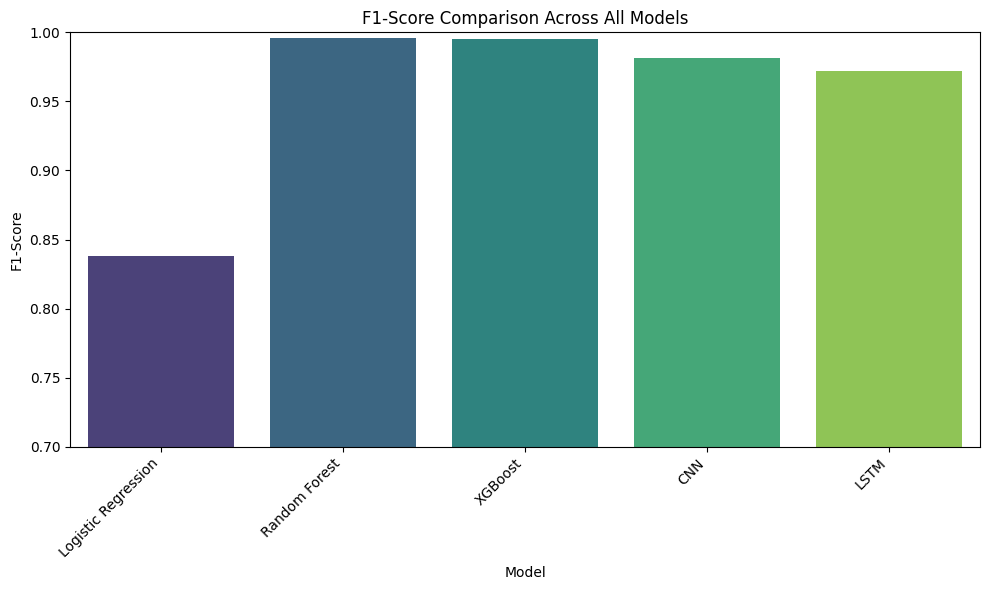

In [ ]:
# ====== Step 1: Import Libraries ======
cnn_accuracy = 0.9839
cnn_precision = 0.9794
cnn_recall = 0.9836
cnn_f1 = 0.9815

lstm_accuracy = 0.9753
lstm_precision = 0.9668
lstm_recall = 0.9766
lstm_f1 = 0.9717

# Best Tuned XGBoost Model metrics (already available in kernel state)
tuned_xgb_accuracy = acc_tuned # Using acc_tuned from the last execution, which is for the tuned XGBoost
tuned_xgb_precision = prec_tuned
tuned_xgb_recall = rec_tuned
tuned_xgb_f1 = f1_tuned

# Retrieve results from the initial model comparison for LR, RF, and untuned XGBoost
initial_results_df = results_df.copy()

# Filter out 'Untuned XGBoost' from the initial results
filtered_initial_results = initial_results_df[initial_results_df['Model'] != 'XGBoost']

# Add CNN, LSTM, and Tuned XGBoost to the comparison DataFrame
comparison_data = []
for index, row in filtered_initial_results.iterrows():
    comparison_data.append([row['Model'], row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score']])

comparison_data.append(['XGBoost', tuned_xgb_accuracy, tuned_xgb_precision, tuned_xgb_recall, tuned_xgb_f1])
comparison_data.append(['CNN', cnn_accuracy, cnn_precision, cnn_recall, cnn_f1])
comparison_data.append(['LSTM', lstm_accuracy, lstm_precision, lstm_recall, lstm_f1])

full_comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

print("\nOverall Model Comparison:")
print(full_comparison_df.round(4))

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=full_comparison_df, hue='Model', legend=False, palette='viridis')
plt.title('F1-Score Comparison Across All Models')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.ylim(0.7, 1.0) # Adjust y-axis limit for better visual distinction
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Accuracy Comparison Across Models :
                 Model  Accuracy
0  Logistic Regression    0.8709
1        Random Forest    0.9965
2              XGBoost    0.9959
3                  CNN    0.9839
4                 LSTM    0.9753


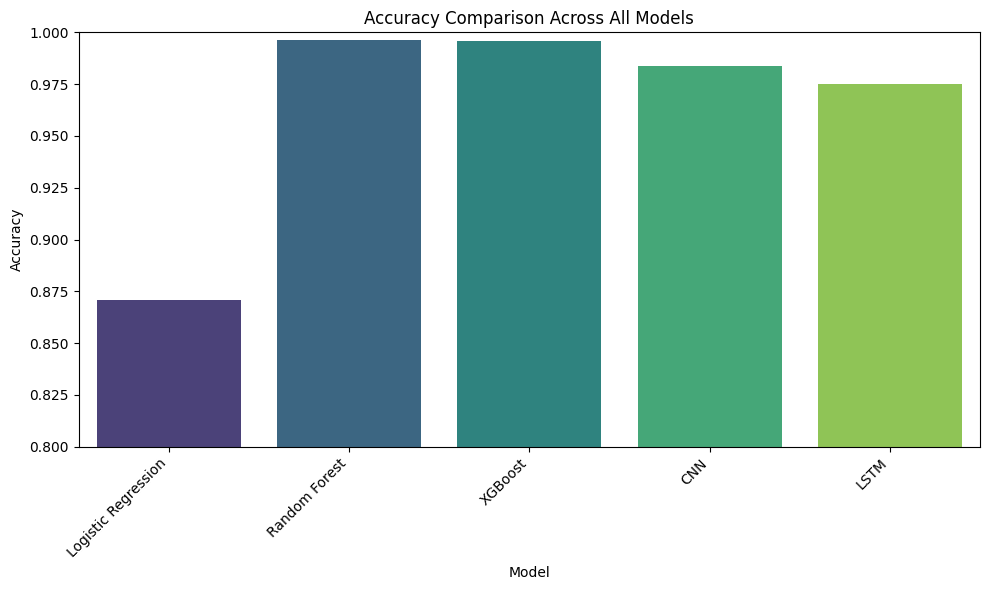

In [ ]:
print("\nAccuracy Comparison Across Models :")
print(full_comparison_df[['Model', 'Accuracy']].round(4))

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=full_comparison_df, hue='Model', legend=False, palette='viridis')
plt.title('Accuracy Comparison Across All Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0) # Adjust y-axis limit for better visual distinction
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Accuracy Comparison Across Models:
                 Model  Accuracy
0  Logistic Regression    0.8709
1        Random Forest    0.9965
2      Untuned XGBoost    0.9961
3        Tuned XGBoost    0.9727
4                  CNN    0.9839
5                 LSTM    0.9753


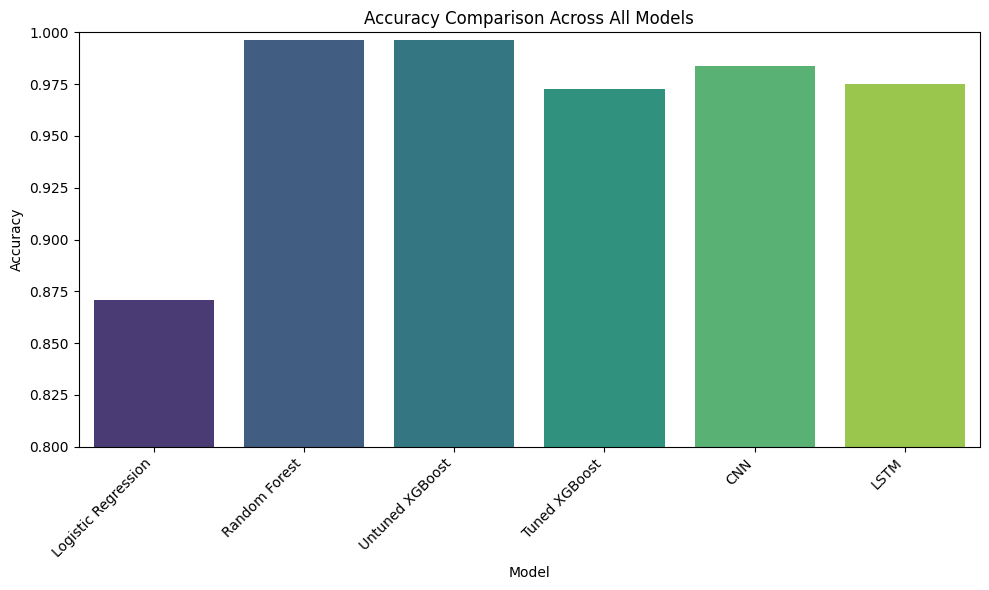

In [ ]:
print("\nAccuracy Comparison Across Models:")
print(full_comparison_df[['Model', 'Accuracy']].round(4))

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=full_comparison_df, hue='Model', legend=False, palette='viridis')
plt.title('Accuracy Comparison Across All Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 1.0) # Adjust y-axis limit for better visual distinction
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Accuracy Comparison: CNN vs LSTM Models
  Model  Accuracy
4   CNN    0.9839
5  LSTM    0.9753


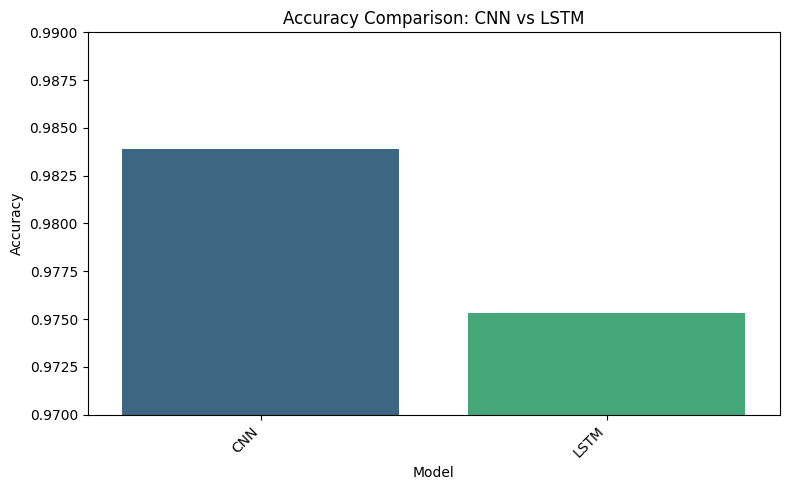

In [ ]:
cnn_lstm_accuracy = full_comparison_df[full_comparison_df['Model'].isin(['CNN', 'LSTM'])][['Model', 'Accuracy']]
print("\nAccuracy Comparison: CNN vs LSTM Models")
print(cnn_lstm_accuracy.round(4))

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=cnn_lstm_accuracy, hue='Model', legend=False, palette='viridis')
plt.title('Accuracy Comparison: CNN vs LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.97, 0.99) # Adjust y-axis limit for better visual distinction
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Untuned XGBoost Model ###

--- XGBoost Model Initialization ---
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:59:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Model Training Complete ---

--- XGBoost Prediction Complete ---

📊 XGBoost Performance:
Accuracy: 0.9961
Precision: 0.9961
Recall: 0.9948
F1-Score: 0.9955


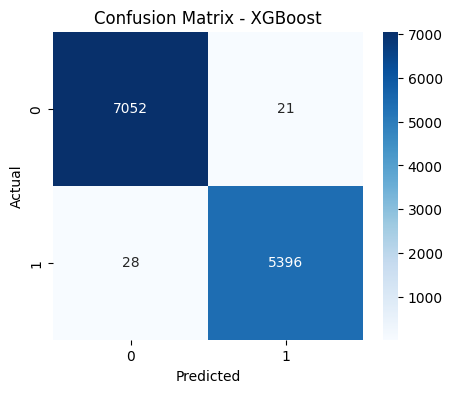



### Tuned XGBoost Model (GridSearchCV) ###

--- Tuned XGBoost Model Initialization ---
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

--- Parameter Grid Defined ---

--- Starting GridSearchCV (this may take a while) ---
Fitting 3 folds for each of 108 candidates, 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:02:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- GridSearchCV Complete ---

🏆 Best Parameters Found:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}

📊 Tuned XGBoost Model Performance:
Accuracy:  0.9959
Precision: 0.9959
Recall:    0.9947
F1-Score:  0.9953


In [ ]:
print("### Untuned XGBoost Model ###")

# XGBoost model initialization
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
print("\n--- XGBoost Model Initialization ---")
print(xgb_model)

# XGBoost model training
xgb_model.fit(X_train_scaled, y_train)
print("\n--- XGBoost Model Training Complete ---")

# XGBoost prediction
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("\n--- XGBoost Prediction Complete ---")

# XGBoost evaluation
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return [model_name, acc, prec, rec, f1]
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Confusion matrix for untuned XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("\n\n### Tuned XGBoost Model (GridSearchCV) ###")

# Tuned XGBoost model initialization
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
print("\n--- Tuned XGBoost Model Initialization ---")
print(xgb)

# Tuned XGBoost parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
print("\n--- Parameter Grid Defined ---")

# Tuned XGBoost GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)
print("\n--- Starting GridSearchCV (this may take a while) ---")
grid_search.fit(X_train_scaled, y_train)
print("\n--- GridSearchCV Complete ---")

# Best parameters for Tuned XGBoost
print("\n🏆 Best Parameters Found:")
print(grid_search.best_params_)

best_xgb = grid_search.best_estimator_

# Tuned XGBoost performance
y_pred_best = best_xgb.predict(X_test_scaled)

acc_tuned = accuracy_score(y_test, y_pred_best)
prec_tuned = precision_score(y_test, y_pred_best)
rec_tuned = recall_score(y_test, y_pred_best)
f1_tuned = f1_score(y_test, y_pred_best)

print("\n📊 Tuned XGBoost Model Performance:")
print(f"Accuracy:  {acc_tuned:.4f}")
print(f"Precision: {prec_tuned:.4f}")
print(f"Recall:    {rec_tuned:.4f}")
print(f"F1-Score:  {f1_tuned:.4f}")

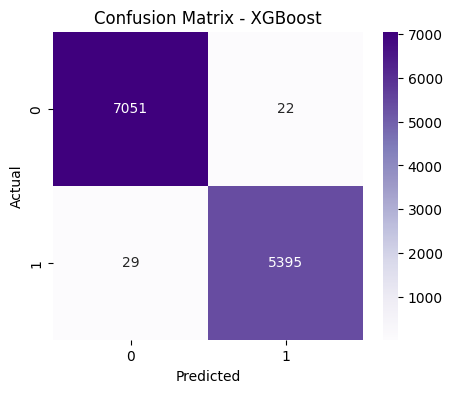

In [ ]:
# Confusion matrix for Tuned XGBoost
cm_tuned = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


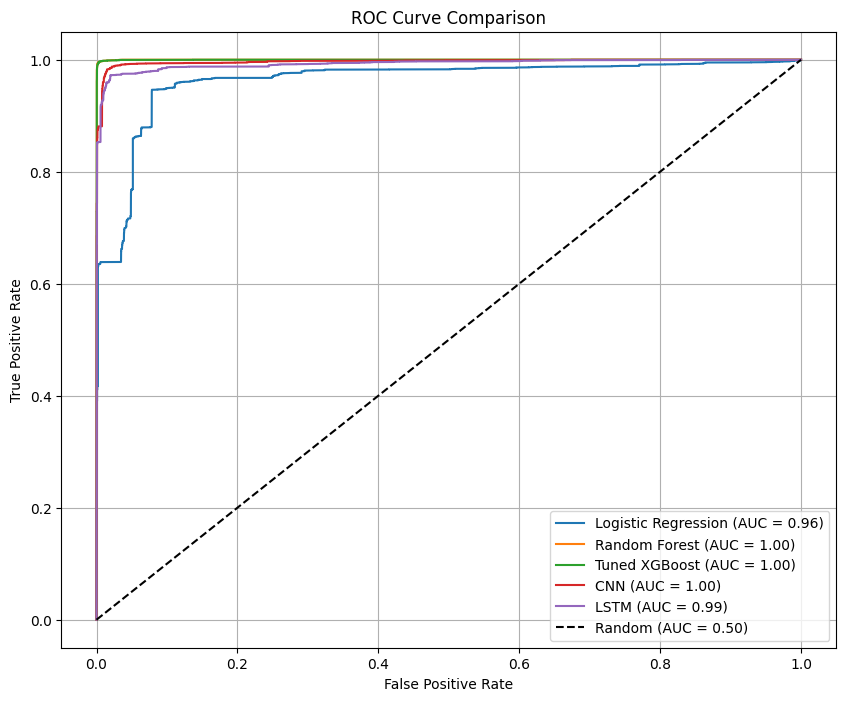

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Logistic Regression ROC Curve
y_pred_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

# Random Forest ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Tuned XGBoost ROC Curve
y_pred_proba_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {roc_auc_xgb:.2f})')

# CNN ROC Curve
y_pred_proba_cnn = model.predict(X_test_cnn)
y_pred_proba_cnn = np.array(model.predict(X_test_cnn)).flatten()
cnn_roc_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_roc_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_roc_model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=0)

y_pred_proba_cnn = cnn_roc_model.predict(X_test_cnn).flatten()
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_proba_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {roc_auc_cnn:.2f})')

y_pred_proba_lstm = model.predict(X_test_lstm).flatten()
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()